<a href="https://colab.research.google.com/github/oumaima61/my-machine-learning-projects/blob/master/heart_failure_clinical_records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing needed packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl 
import scipy.optimize as opt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split  

load a dataset from csv file 

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv") 
df.head(10) 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

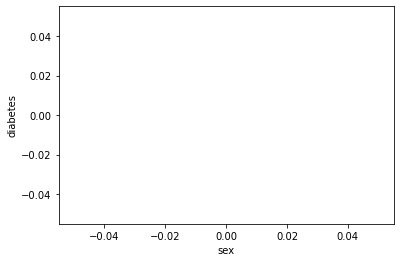

In [ ]:
ax = df[df['age'] == 2][0:50].plot(kind='scatter', x='sex', y='diabetes', color='Blue');
df[df['age'] == 2][0:50].plot(kind='scatter', x='sex', y='diabetes', color='Yellow', ax=ax);
plt.show() 

In [ ]:
features_df = df[['age','anaemia','diabetes','high_blood_pressure']] 
X = np.asarray (features_df) 
X[0:5] 

array([[75.,  0.,  0.,  1.],
       [55.,  0.,  0.,  0.],
       [65.,  0.,  0.,  0.],
       [50.,  1.,  0.,  0.],
       [65.,  1.,  1.,  0.]])

In [ ]:
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].astype('int')
y = np.asarray(df['creatinine_phosphokinase'])
y [0:5]

array([ 582, 7861,  146,  111,  160])

train / test dataset 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (149, 4) (149,)
Test set: (150, 4) (150,)


Modeling 

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat = clf.predict(X_test) 
yhat[0:5] 

array([582, 582, 582, 582, 582])

evaluation 

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix 
import itertools 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.03751937984496124